<a href="https://colab.research.google.com/github/pradeep-0918/SCT_ML_02/blob/main/Task_2_Customer_Segmentation_using_K_Means_Clustering_ML_projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [11]:
df.shape

(200, 5)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [12]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [18]:
X = df.iloc[:, [3, 4]].values

In [19]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

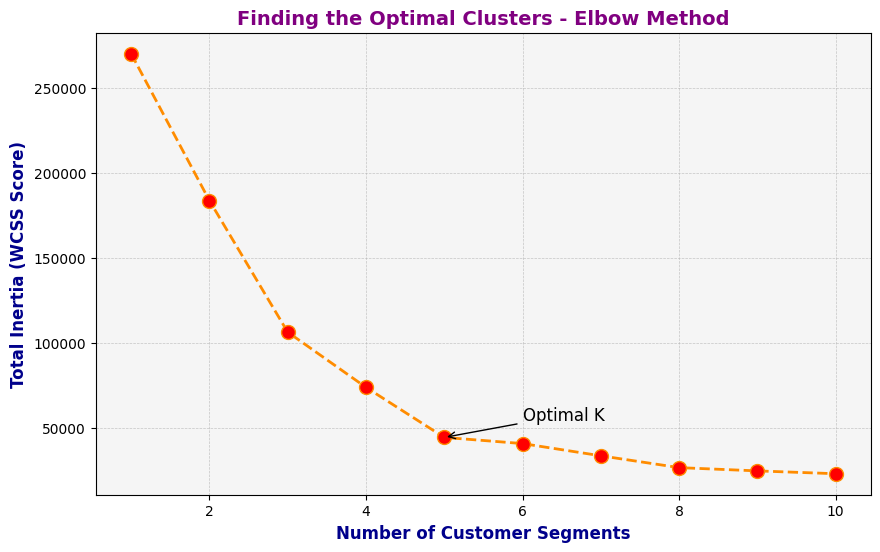

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='darkorange', linewidth=2, markersize=10, markerfacecolor='red')


plt.xlabel("Number of Customer Segments", fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel("Total Inertia (WCSS Score)", fontsize=12, fontweight='bold', color='darkblue')
plt.title("Finding the Optimal Clusters - Elbow Method", fontsize=14, fontweight='bold', color='purple')


plt.gca().set_facecolor('#f5f5f5')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)


optimal_k = 5
plt.annotate("Optimal K", xy=(optimal_k, wcss[optimal_k - 1]), xytext=(optimal_k + 1, wcss[optimal_k - 1] + 10000),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='black')


plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [22]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


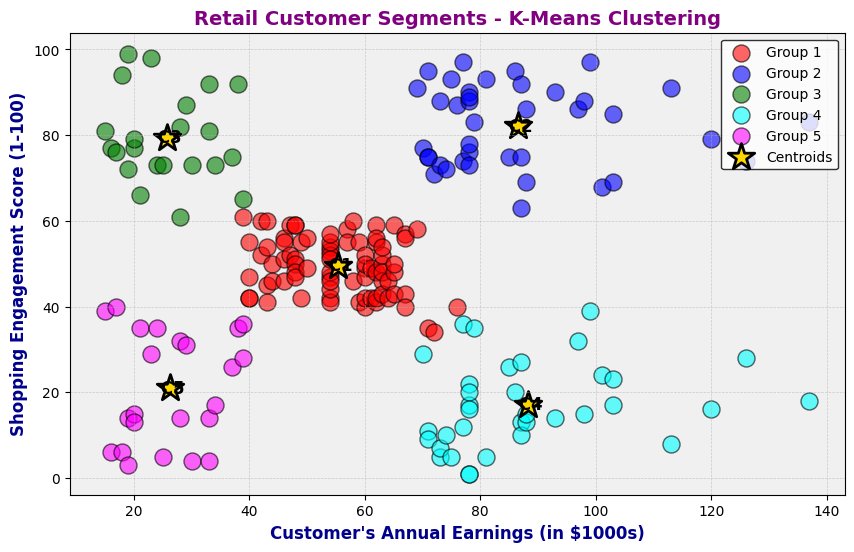

In [23]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

plt.figure(figsize=(10, 6))

for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=150, c=colors[i], label=f'Group {i+1}', alpha=0.6, edgecolors='black', linewidth=1)


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=400, c='gold', marker='*', label='Centroids', edgecolors='black', linewidth=2)

for idx, (x, y) in enumerate(kmeans.cluster_centers_):
    plt.text(x, y, f' C{idx+1}', fontsize=12, fontweight='bold', color='black', verticalalignment='center', horizontalalignment='center')


plt.xlabel("Customer's Annual Earnings (in $1000s)", fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel("Shopping Engagement Score (1-100)", fontsize=12, fontweight='bold', color='darkblue')
plt.title("Retail Customer Segments - K-Means Clustering", fontsize=14, fontweight='bold', color='purple')


plt.gca().set_facecolor('#f0f0f0')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)


plt.legend(fontsize=10, loc="upper right", frameon=True, edgecolor="black")


plt.show()
